# Importing Libraries

In [1]:
# Basics

import numpy as np
import pandas as pd

# Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline # used in preprocessing and in ML

# Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Model Selection

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression

# Machine Learning

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import LinearSVR


import warnings
warnings.filterwarnings('ignore')

# Importing and Analysing Data

In [2]:
# importing data from Dados' folder

df = pd.read_csv('Dados/train.csv')
df_test = pd.read_csv('Dados/test.csv')# Checking the % of NAN values in each feature
df.isnull().sum()/df.shape[0]

Unnamed: 0                 0.0
NU_INSCRICAO               0.0
NU_ANO                     0.0
CO_MUNICIPIO_RESIDENCIA    0.0
NO_MUNICIPIO_RESIDENCIA    0.0
                          ... 
Q046                       0.0
Q047                       0.0
Q048                       0.0
Q049                       0.0
Q050                       0.0
Length: 167, dtype: float64

In [3]:
# selecting only the columns that are in the test set

columns = list(df_test.columns)
columns.append('NU_NOTA_MT')
df = df[columns]

In [4]:
# Checking the number of features

len(df.columns)

48

In [5]:
# Creating the answer DF with the registration and math's grade

df_answer = pd.DataFrame(index = range(df_test.shape[0]), columns=['NU_INSCRICAO','NU_NOTA_MT'])
df_answer['NU_INSCRICAO'] = df_test['NU_INSCRICAO']

In [6]:
# Checking the % of NAN values in each feature

df.isnull().sum()/df.shape[0]

NU_INSCRICAO              0.000000
CO_UF_RESIDENCIA          0.000000
SG_UF_RESIDENCIA          0.000000
NU_IDADE                  0.000000
TP_SEXO                   0.000000
TP_COR_RACA               0.000000
TP_NACIONALIDADE          0.000000
TP_ST_CONCLUSAO           0.000000
TP_ANO_CONCLUIU           0.000000
TP_ESCOLA                 0.000000
TP_ENSINO                 0.688128
IN_TREINEIRO              0.000000
TP_DEPENDENCIA_ADM_ESC    0.688128
IN_BAIXA_VISAO            0.000000
IN_CEGUEIRA               0.000000
IN_SURDEZ                 0.000000
IN_DISLEXIA               0.000000
IN_DISCALCULIA            0.000000
IN_SABATISTA              0.000000
IN_GESTANTE               0.000000
IN_IDOSO                  0.000000
TP_PRESENCA_CN            0.000000
TP_PRESENCA_CH            0.000000
TP_PRESENCA_LC            0.000000
CO_PROVA_CN               0.000000
CO_PROVA_CH               0.000000
CO_PROVA_LC               0.000000
CO_PROVA_MT               0.000000
NU_NOTA_CN          

In [7]:
# checking if the % of missing grades are because the student were absent
df[(df['TP_PRESENCA_LC']==0)|(df['TP_PRESENCA_LC']==2)].shape[0]/df.shape[0]

0.2619810633648944

In [8]:
# The assumption was correct. 26.19% were absent, so they had a grade iqual to 0.
# They will be deleted from the training dataframe and it will be aplied a grade iqual 0 in the test set answer

df = df.dropna(subset = ['TP_STATUS_REDACAO'])

# Selecting the registration of absent students from the test set

absent_test = df_test[(df_test['TP_PRESENCA_LC']==0)|(df_test['TP_PRESENCA_LC']==2)]['NU_INSCRICAO']
present_test = df_test[df_test['TP_PRESENCA_LC']==1]['NU_INSCRICAO']
absent_test = absent_test.to_list()
present_test = present_test.to_list()

# Imputing 0 to the absent students

df_answer.loc[df_answer['NU_INSCRICAO'].isin(absent_test),'NU_NOTA_MT'] = 0

In [9]:
# Checking the result

df.isnull().sum()/df.shape[0]

NU_INSCRICAO              0.000000
CO_UF_RESIDENCIA          0.000000
SG_UF_RESIDENCIA          0.000000
NU_IDADE                  0.000000
TP_SEXO                   0.000000
TP_COR_RACA               0.000000
TP_NACIONALIDADE          0.000000
TP_ST_CONCLUSAO           0.000000
TP_ANO_CONCLUIU           0.000000
TP_ESCOLA                 0.000000
TP_ENSINO                 0.640876
IN_TREINEIRO              0.000000
TP_DEPENDENCIA_ADM_ESC    0.640876
IN_BAIXA_VISAO            0.000000
IN_CEGUEIRA               0.000000
IN_SURDEZ                 0.000000
IN_DISLEXIA               0.000000
IN_DISCALCULIA            0.000000
IN_SABATISTA              0.000000
IN_GESTANTE               0.000000
IN_IDOSO                  0.000000
TP_PRESENCA_CN            0.000000
TP_PRESENCA_CH            0.000000
TP_PRESENCA_LC            0.000000
CO_PROVA_CN               0.000000
CO_PROVA_CH               0.000000
CO_PROVA_LC               0.000000
CO_PROVA_MT               0.000000
NU_NOTA_CN          

In [10]:
# Dropping also the students that were abstent in the CN test, because there was only 0.35% of them

df = df.dropna(subset = ['NU_NOTA_CN'])

In [11]:
df.isnull().sum()/df.shape[0]

NU_INSCRICAO              0.000000
CO_UF_RESIDENCIA          0.000000
SG_UF_RESIDENCIA          0.000000
NU_IDADE                  0.000000
TP_SEXO                   0.000000
TP_COR_RACA               0.000000
TP_NACIONALIDADE          0.000000
TP_ST_CONCLUSAO           0.000000
TP_ANO_CONCLUIU           0.000000
TP_ESCOLA                 0.000000
TP_ENSINO                 0.640685
IN_TREINEIRO              0.000000
TP_DEPENDENCIA_ADM_ESC    0.640685
IN_BAIXA_VISAO            0.000000
IN_CEGUEIRA               0.000000
IN_SURDEZ                 0.000000
IN_DISLEXIA               0.000000
IN_DISCALCULIA            0.000000
IN_SABATISTA              0.000000
IN_GESTANTE               0.000000
IN_IDOSO                  0.000000
TP_PRESENCA_CN            0.000000
TP_PRESENCA_CH            0.000000
TP_PRESENCA_LC            0.000000
CO_PROVA_CN               0.000000
CO_PROVA_CH               0.000000
CO_PROVA_LC               0.000000
CO_PROVA_MT               0.000000
NU_NOTA_CN          

In [12]:
# The features TP_ENSINO, TP_DEPENDENCIA_ADM_ESC and Q027 had a high number of missing values, so they were dropped

df = df.drop(['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC','Q027'], axis=1)
df_test = df_test.drop(['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC','Q027'], axis=1)

## Analysing each feature

In [13]:
# copying the df and printing the first 5 samples and 20 features

df_train = df.copy()
df.iloc[:,:20].head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,0,0,0,0,0,0,0,0,0,1
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,0,0,0,0,0,0,0,0,0,1
5,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,29,BA,18,F,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1
6,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,51,MT,18,F,3,1,2,0,2,0,0,0,0,0,0,0,0,0,1
7,2eb189d4912f64b19d1967e8e84b6141aba18770,43,RS,18,F,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1


In [14]:
df.iloc[:,20:40].head()

,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006
0,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C
1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B
5,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,439.7,583.2,410.9,0,1.0,120.0,120.0,120.0,160.0,100.0,620.0,E,E,C
6,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,420.1,604.2,484.5,0,1.0,100.0,120.0,120.0,120.0,100.0,560.0,E,D,C
7,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,619.6,625.8,611.2,0,1.0,140.0,120.0,120.0,120.0,120.0,620.0,G,F,L


In [15]:
df.iloc[:,40:].head()

,Q024,Q025,Q026,Q047,NU_NOTA_MT
0,A,A,C,A,399.4
1,A,A,A,A,459.8
5,B,B,A,A,364.5
6,B,B,C,A,529.2
7,B,B,A,D,566.7


In [16]:
# Checking the number of samples with 'TP_ANO_CONCLUIU' equal to 0 (data not informed)

df[df['TP_ANO_CONCLUIU']==0].shape[0]/df.shape[0]

0.5706645538278696

In [17]:
# high number of not informed information, drop the feature
# dropping also the presence feature, because they are all equal to 1, the samples with diferent values were already dropped
# all the answer to the social form were drop also

df_train = df_train.drop(['NU_INSCRICAO','CO_UF_RESIDENCIA','TP_ANO_CONCLUIU',
                         'TP_PRESENCA_LC','TP_PRESENCA_CH','TP_PRESENCA_CN','CO_PROVA_CN','CO_PROVA_CH',
                         'CO_PROVA_LC','CO_PROVA_MT','TP_STATUS_REDACAO',
                         'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
                         'Q047'], axis = 1)

# Feature Engineering

In [18]:
# creating a new feature with the brazilian regions

def estadopararegiao(df):
    df_temp = df.copy()
    df_temp['regiao'] = ''
    regioes = {
        'AC': 'Amazonia',
        'AM': 'Amazonia',
        'RR': 'Amazonia',
        'RO': 'Amazonia',
        'AP': 'Amazonia',
        'PA': 'Amazonia',
        'TO': 'Amazonia',
        'MA': 'Nordeste',
        'PI': 'Nordeste',
        'CE': 'Nordeste',
        'RN': 'Nordeste',
        'PB': 'Nordeste',
        'PE': 'Nordeste',
        'AL': 'Nordeste',
        'SE': 'Nordeste',
        'BA': 'Nordeste',
        'ES': 'Sudeste',
        'RJ': 'Sudeste',
        'MG': 'Sudeste',
        'SP': 'Sudeste',
        'MT': 'CentroOeste',
        'GO': 'CentroOeste',
        'MS': 'CentroOeste',
        'DF': 'CentroOeste',
        'PR': 'Sul',
        'RS': 'Sul',
        'SC': 'Sul'
    }
    df_temp['regiao'] = df_temp['SG_UF_RESIDENCIA'].map(regioes)
    return df_temp['regiao']

df_train['regiao'] = estadopararegiao(df_train)
df_test['regiao'] = estadopararegiao(df_test)

# droppinh the state feature

df_train = df_train.drop(['SG_UF_RESIDENCIA'],axis = 1)
df_test = df_test.drop(['SG_UF_RESIDENCIA'],axis = 1)

In [19]:
# mapping the sex feature

FM = {
    'F':0,
    'M':1
}
df_train['TP_SEXO'] = df_train['TP_SEXO'].map(FM)
df_test['TP_SEXO'] = df_test['TP_SEXO'].map(FM)

In [20]:
# using thet_dummies in the regiao feature

df_train = pd.get_dummies(df_train,drop_first = True)
df_test = pd.get_dummies(df_test,drop_first = True)

# Functions used

In [21]:
def model_selection(X, y, models, names):
    # train a list of algorithm and return a data frame of each of them with the score for regression problem
    # X - Features to train the model
    # y - target
    # models - a list with models
    # names - the name of each model
    
    # creating an empty data data frame
    columns = ['Algorithm', 'R2', 'R2 Std', 'RMSE', 'RMSE Std']
    df = pd.DataFrame(columns = columns, index = range(len(models)))
    
    Kfolds = KFold(n_splits=5, random_state=42, shuffle=True)
    
    for i in range(len(models)):
        df.iloc[i,0]= names[i]
        
        scoresr2 = cross_val_score(estimator = models[i], X=X, y=y, cv=Kfolds, n_jobs = -1,scoring = 'r2')
        df.iloc[i,1]= np.mean(scoresr2)
        df.iloc[i,2]= np.std(scoresr2)
        
        scoresmse = cross_val_score(estimator = models[i], X=X, y=y, cv=Kfolds, n_jobs = -1,scoring = 'neg_mean_squared_error')
        df.iloc[i,3]= np.mean(np.sqrt(-scoresmse))
        df.iloc[i,4]= np.std(np.sqrt(-scoresmse))
        
    print(df)

In [22]:
def corrdrop(df):
    # compare the correlation between features, select the ones with correlation greather than 0.8 
    # and suggest to drop the one with weaker correlation with the target
    # the target must be the last feature
    
    corMatrix = df.corr()
    drop = []
    for i in range(1,len(corMatrix)):
        for j in range(i):
            if abs(corMatrix.iloc[i,j])>=0.8:
                print('\n%s vs %s'% (corMatrix.columns[i],corMatrix.columns[j]))
                print('Correlation: %.3f' % (corMatrix.iloc[i,j]))
                if abs(corMatrix.iloc[-1,j]) > abs(corMatrix.iloc[-1,i]):
                    print('Drop: %s' %(corMatrix.columns[i]))
                    drop.append(corMatrix.columns[i])
                else:
                    print('Drop: %s' %(corMatrix.columns[j]))
                    drop.append(corMatrix.columns[j])

# Feature Selection

In [23]:
X_train = df_train.drop(['NU_NOTA_MT'], axis = 1)
y_train = pd.DataFrame(df_train['NU_NOTA_MT'])

k = 2 - R2 = 0.37110141858601364 +/- 0.027876092974249877
k = 3 - R2 = 0.3912112659501777 +/- 0.026251031184320695
k = 4 - R2 = 0.38301032967074883 +/- 0.02072134279013451
k = 5 - R2 = 0.38706491900236073 +/- 0.027239130462111155
k = 6 - R2 = 0.3787724235281998 +/- 0.023167458765188283
k = 7 - R2 = 0.3812378666878425 +/- 0.025668983016618623
k = 8 - R2 = 0.37896543245873665 +/- 0.02673206981027622
k = 9 - R2 = 0.37998589985594294 +/- 0.0219672727458455
k = 10 - R2 = 0.3823087889515132 +/- 0.026014508055265013
k = 11 - R2 = 0.39319972550380405 +/- 0.025240276479119892
k = 12 - R2 = 0.3982230580072372 +/- 0.024541698239146263
k = 13 - R2 = 0.40140366517362097 +/- 0.0236861189347712
k = 14 - R2 = 0.40166600867058905 +/- 0.02453874952113021
k = 15 - R2 = 0.39958073737575567 +/- 0.0233705513773226
k = 16 - R2 = 0.3936360321087343 +/- 0.0180197984051333
k = 17 - R2 = 0.3981301636569884 +/- 0.020189196495609036
k = 18 - R2 = 0.40772299304337656 +/- 0.020990258600809934
k = 19 - R2 = 0.4059896

(0, 0.5)

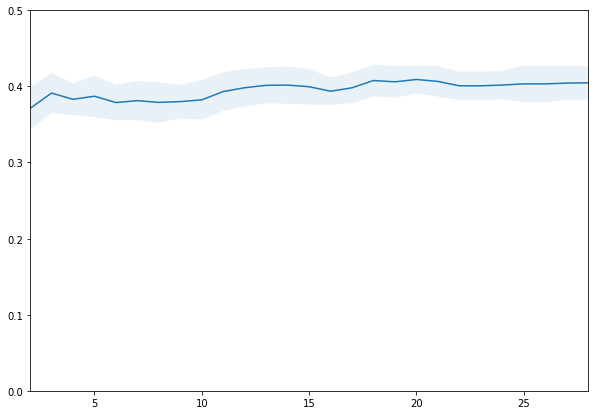

In [24]:
# Using selectKBest to select the features
Kfolds = KFold(n_splits=10, random_state=42, shuffle=True)
k_vs_score = []
k_vs_score_stdma = []
k_vs_score_stdme = []
xgb = XGBRegressor(silent=True,random_state = 1)

for k in range(2,len(X_train.columns)):
    selector = SelectKBest(score_func = f_regression, k = k)
    
    Xtrain2 = selector.fit_transform(X_train, y_train)
    
    r2 = cross_val_score(estimator = xgb, X=Xtrain2, y=y_train, cv=Kfolds, n_jobs = -1,scoring = 'r2')
    
    print('k = {} - R2 = {} +/- {}'.format(k,np.mean(r2),np.std(r2)))
    
    k_vs_score.append(np.mean(r2))
    k_vs_score_stdma.append(np.mean(r2)+np.std(r2))
    k_vs_score_stdme.append(np.mean(r2)-np.std(r2))
    
pd.Series(k_vs_score, index = range(2,len(X_train.columns))).plot(figsize = (10,7))
plt.fill_between(range(2,len(X_train.columns)),k_vs_score_stdma,k_vs_score_stdme,alpha=.1)
plt.ylim(0,0.5)

In [25]:
# selecting the best 20 features
selector = SelectKBest(score_func = f_regression, k= 22)
selector.fit(X_train,y_train)
X_train.columns[selector.get_support()]

Index(['NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'IN_TREINEIRO', 'IN_SURDEZ',
       'IN_SABATISTA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'regiao_Nordeste', 'regiao_Sudeste',
       'regiao_Sul'],
      dtype='object')

In [26]:
# Selecting the features selected above

X_train = X_train[['NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'IN_TREINEIRO', 'IN_SURDEZ',
       'IN_SABATISTA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'regiao_Nordeste', 'regiao_Sudeste',
       'regiao_Sul']]

In [27]:
# The algorithms to be used

pipe_knr = make_pipeline(StandardScaler(),KNeighborsRegressor())

std = StandardScaler()

linear = LinearRegression()

ridge = Ridge()

lasso = Lasso ()

elanet = ElasticNet()

forest = RandomForestRegressor(random_state = 1)

xgb = XGBRegressor(silent=True,random_state = 1)

pipe_svr = make_pipeline(StandardScaler(),LinearSVR(random_state = 1))

#creating one list with the algorithms and one with their names

models = [pipe_knr, linear, ridge, lasso, elanet, forest, xgb, pipe_svr]
algoriths_names = ['Knn', 'Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'Random Forest', 'XGBoost', 'SVM Regressor']

In [28]:
model_selection(X = X_train, y = y_train, models = models, names = algoriths_names)

           Algorithm        R2     R2 Std     RMSE RMSE Std
0                Knn  0.340696  0.0176663  80.8793  1.42178
1  Linear Regression  0.418138  0.0162965  75.9857  1.64614
2              Ridge  0.418171  0.0162768  75.9835   1.6444
3              Lasso  0.416709  0.0175108  76.0789  1.74956
4         ElasticNet   0.40948  0.0179248  76.5501  1.82407
5      Random Forest   0.38306  0.0175283  78.2427  1.71785
6            XGBoost  0.401274  0.0155234   77.074  1.29166
7      SVM Regressor  0.407567   0.018405  76.6688  1.63523


In [29]:
# A randomized search will be done, because the results are too similar. The algorithm selected to it was XGboost,
# because it has the smaller std

parameters = {"learning_rate"    : [ 0.05, 0.10, 0.15 ] ,
     "max_depth"        : [ 3, 5 ],
     "min_child_weight" : [ 3, 5 ],
     "gamma"            : [ 0.0, 0.5 ],
     "colsample_bytree" : [  0.5, 0.7 ] }

xgb_gscv = RandomizedSearchCV(xgb, param_distributions=parameters,
                                     n_iter=200,
                                     scoring='r2' ,
                                     cv = Kfolds,
                                     n_jobs = -1)

xgb_gscv.fit(X_train, y_train)

print(xgb_gscv.best_params_)
print(xgb_gscv.best_score_)

[10:11:08] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


{'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.7}
0.4689551855394081


In [30]:
# the final estimator is going to be the output from the xgboost randomizes seach

final_model = xgb_gscv.best_estimator_
df_test = df_test[X_train.columns]
df_answer.loc[df_answer['NU_INSCRICAO'].isin(present_test),'NU_NOTA_MT'] = final_model.predict(df_test.loc[df_answer['NU_INSCRICAO'].isin(present_test),])
df_answer.to_csv('answer.csv',index = False)

In [31]:
df_answer.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,436.7
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,443.942
2,b38a03232f43b11c9d0788abaf060f7366053b6d,592.575
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,561.856
